In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')


from scipy.stats import chi2_contingency
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [95]:
df = pd.read_csv('train.csv')

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [98]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning the data:

-Cabin

-Binning the Fare
-Binning age

In [99]:
def randomfunc(val):
    """gets the first letter of the cabin, returns null otherwise. """
    v = str(val)
    if v == 'nan':
        return np.NaN
    else:
        return v[0]
        

In [100]:
df['Cabin'] = (df.Cabin).apply(randomfunc)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


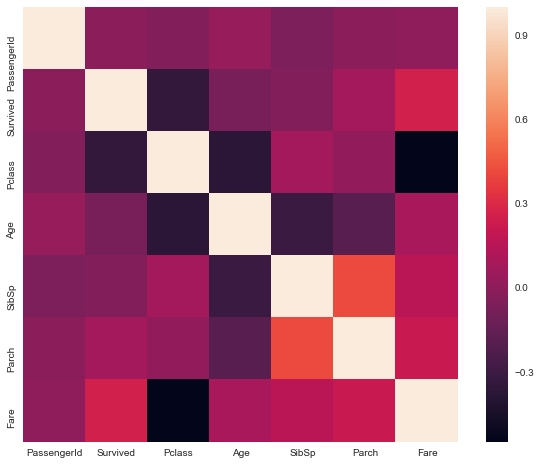

In [102]:
fig, ax = plt.subplots(figsize=(10,8) )
sns.heatmap(df.corr(), square=True )



The average age for a passenger is ~29 years old. Comparing this number to the average age of passengers who survived and those who did not, is only +/- 1 year.  

The age distribution looks like there are more adults than there are children. However, if you look at the distribution of age between those who survived vs. those who did not, the distribution of non-survivors is more skewked towards passengers around the age of 30. Those that did survived, I would assume that women and children would contribute to most of the survived passenger population and the older, perhaps more wealthier folks of the first class. 

You can see that by comparing the age distribution between the different classes that there is more a right-skew of age in third class passengers than there are in the first and second class. The age distribution is more uniform in first class. 

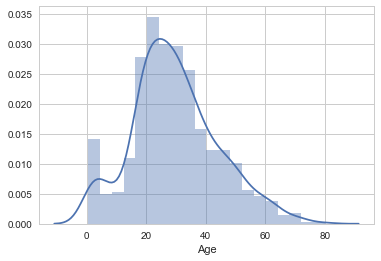

In [103]:
sns.distplot((df.Age).dropna())
#the distribution of age

In [104]:
#finding the average age of survived passengers
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

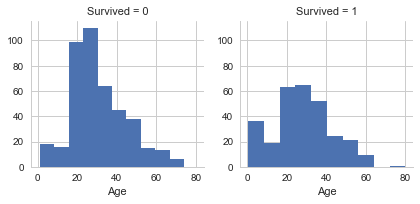

In [105]:
g = sns.FacetGrid(data=df, col='Survived')
g = g.map(plt.hist, "Age")

In [106]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [107]:
df.groupby(['Pclass','Survived'])['Age'].mean()

Pclass  Survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: Age, dtype: float64

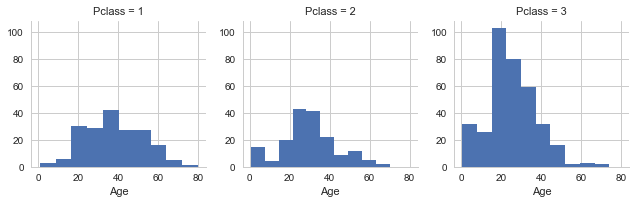

In [108]:
g = sns.FacetGrid(data=df, col='Pclass')
g = g.map(plt.hist, 'Age')

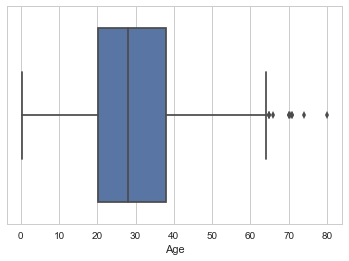

In [109]:
sns.boxplot(df.Age.dropna())

In [110]:
def age_func(val):
    #categorizes people by age group
    if val >0.0 and val<20.0:
        return "Child"
    if val>=20.0 and val<=38.0:
        return "Adult"
    else:
        return "Old"

In [111]:
df['Age_Group'] = df['Age'].apply(age_func)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


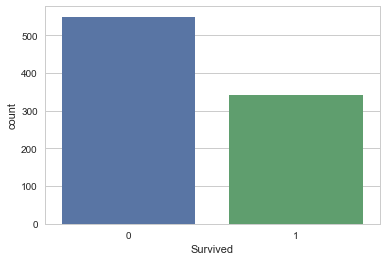

In [113]:
sns.countplot(x='Survived', data=df)

In [114]:
df.groupby(['Age_Group','Survived'])['Age'].mean()

Age_Group  Survived
Adult      0           27.732456
           1           28.906897
Child      0           13.535294
           1           10.305949
Old        0           49.657658
           1           48.696970
Name: Age, dtype: float64

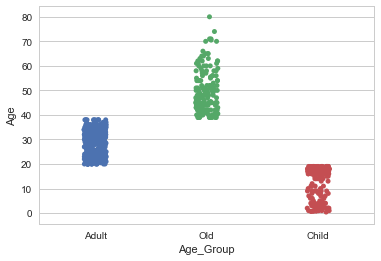

In [115]:
sns.stripplot(x='Age_Group', y='Age',data=df, jitter=True)

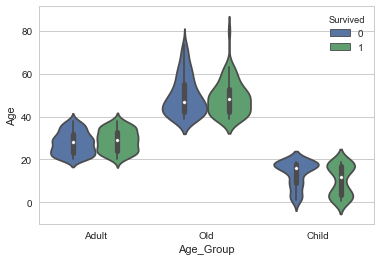

In [116]:
sns.violinplot(x='Age_Group',y='Age',hue='Survived', data=df)

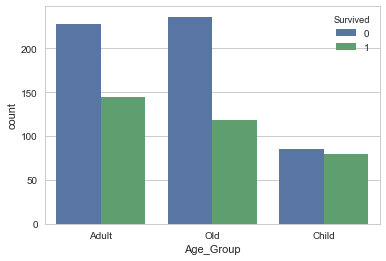

In [117]:
sns.countplot(x='Age_Group', hue='Survived', data=df)

Let's look at the differences in class

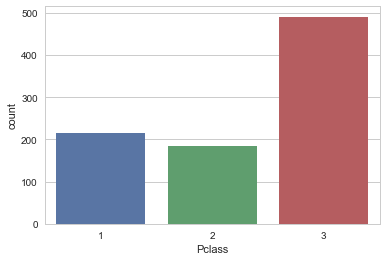

In [118]:
sns.countplot(x='Pclass', data=df)

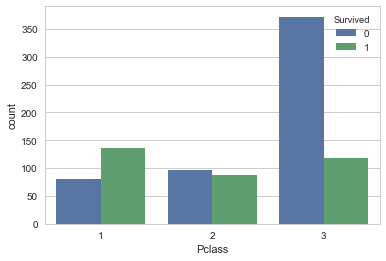

In [119]:
sns.countplot(x='Pclass',hue='Survived', data=df)

In [120]:
c = [1,2,3]
for pclass in c:
    if pclass == 3:
        third_class = (len(df[df.Pclass==pclass]))
        print('Third Class: {}'.format(third_class))
    if pclass ==2:
        second =  (len(df[df.Pclass==pclass]))
        print ('Second Class:{}'.format(second))
    if pclass==1:
        first =  (len(df[df.Pclass==pclass]))
        print ('First:{}'.format(first))

First:216
Second Class:184
Third Class: 491


In [121]:
df.groupby(['Pclass','Sex'])['Survived'].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

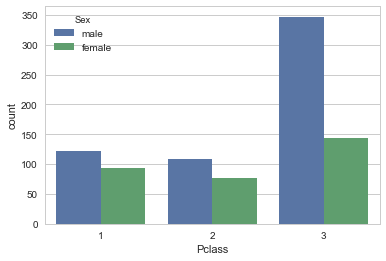

In [122]:
sns.countplot(x='Pclass',hue='Sex', data=df)

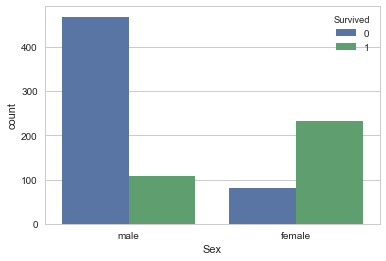

In [123]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [125]:
cols = ['Pclass','Sex','SibSp','Parch','Cabin','Age_Group']
for c in cols:
    table = pd.crosstab(index=df['Survived'], columns=df[c])
    print (table)

    chi2, p_val, dof, expected = chi2_contingency(table)
    print ('Chi2 = {}'.format(chi2))
    print ('P-Value = {}'.format(p_val))
    print ('\t')
    print ('\t')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Chi2 = 102.88898875696056
P-Value = 4.549251711298793e-23
	
	
Sex       female  male
Survived              
0             81   468
1            233   109
Chi2 = 260.71702016732104
P-Value = 1.1973570627755645e-58
	
	
SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
Chi2 = 37.27179291520431
P-Value = 1.5585810465902116e-06
	
	
Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
Chi2 = 27.925784060236168
P-Value = 9.703526421039997e-05
	
	
Cabin     A   B   C   D   E  F  G  T
Survived                            
0         8  12  24   8   8  5  2  1
1         7  35  35  25  24  8  2  0
Chi2 = 10.300556313502582
P-Value = 0.1721713412821439
	
	
Age_Group  Adult  Child  Old
Survived                    
0            228  

From using the Chi Squared Contingency table test, there is an association between Survival and the following columns: Pclass and Sex. However, for the number of siblings/spouses and parents/children, the expected counts are less than 5 and therefore cannot use the test. Also, I thought the age group would have a correlation with survival, but I guess not since the p-value is equal to alpha. 

# Handling missing values 


In [134]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))

In [138]:
df['Age_Group'] = df['Age'].apply(age_func)

In [140]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Age_Group      False
dtype: bool

In [162]:
cabin_mode = df['Cabin'].mode()[0]

In [166]:
df['Cabin'] = df['Cabin'].fillna(cabin_mode)

In [167]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
Age_Group      891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [177]:
df['Embarked'] = df['Embarked'].dropna()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
Age_Group      891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [179]:
data = pd.get_dummies(data=df, columns=['Cabin','Embarked','Age_Group','Sex', 'Pclass'])

In [180]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_Group_Adult', 'Age_Group_Child', 'Age_Group_Old',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [182]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,...,0,1,1,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,...,0,0,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,1,1,0,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,...,0,1,1,0,0,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,...,0,1,1,0,0,0,1,0,0,1


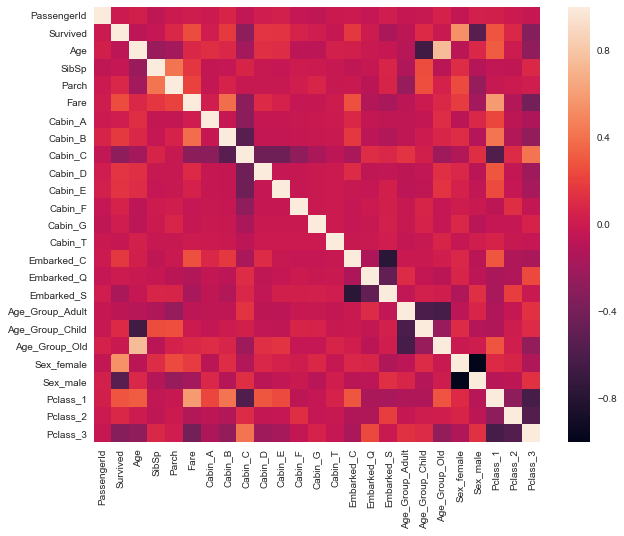

In [185]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr())

In [188]:
y = data['Survived']

In [193]:
X = data.drop(labels=['Survived','Name','PassengerId','Ticket'], axis=1)

In [201]:
model = sm.Logit(y.dropna(), X.dropna())
result = model.fit()

         Current function value: 0.429040
         Iterations: 35


C:\Users\sophia\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [202]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                           19
Date:                Tue, 22 May 2018   Pseudo R-squ.:                  0.3557
Time:                        17:43:51   Log-Likelihood:                -382.27
converged:                      False   LL-Null:                       -593.33
                                        LLR p-value:                 1.095e-77
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0451      0.017     -2.671      0.008      -0.078      -0.012
SibSp              -0.3328      0.113     -2.950      0.003      -0.554      -0.112
Parch              -0.1279      

C:\Users\sophia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\sophia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sophia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sophia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [205]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [206]:
X.shape

(891, 23)

In [208]:
X_new = SelectKBest(chi2, k=10)


In [211]:
XX = X_new.fit_transform(X,y)

In [213]:
X_new.scores_

array([  2.52432303e+01,   2.58186538e+00,   1.00974991e+01,
         4.51831909e+03,   4.35116480e-01,   2.58755806e+01,
         1.16532470e+01,   1.94896462e+01,   1.81406385e+01,
         2.94697020e+00,   2.28213978e-01,   6.22950820e-01,
         2.04644013e+01,   1.08467891e-02,   5.98483982e+00,
         1.53079379e+00,   6.64187220e+00,   8.98495196e-02,
         1.70348127e+02,   9.27024470e+01,   5.51751510e+01,
         6.16076687e+00,   4.15530709e+01])

In [215]:
X_new.pvalues_

array([  5.05366400e-07,   1.08094210e-01,   1.48470676e-03,
         0.00000000e+00,   5.09488990e-01,   3.64146757e-07,
         6.40905703e-04,   1.01146449e-05,   2.05175592e-05,
         8.60387225e-02,   6.32851311e-01,   4.29952852e-01,
         6.07507131e-06,   9.17051963e-01,   1.44293530e-02,
         2.15993350e-01,   9.96092007e-03,   7.64368547e-01,
         6.21058490e-39,   6.07783826e-22,   1.10253810e-13,
         1.30614569e-02,   1.14714147e-10])

In [250]:
important = X_new.get_support(indices=True)

In [254]:
important_cols = []
for cols in important:
    important_cols.append(X.columns[cols])

In [257]:
X_2= data[important_cols]

In [260]:
model = sm.Logit(y, X_2)
result = model.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.441885
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 May 2018   Pseudo R-squ.:                  0.3364
Time:                        21:04:50   Log-Likelihood:                -393.72
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.014e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0347      0.008     -4.556      0.000      -0.050      -0.020
Fare           0.0005      0.